# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Импортируем библиотеки, необходимые для работы**

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

**Откроем файл и сохраним в переменную data**

In [216]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

**Общая информация и тип данных в датафрейме**

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вывод по методу.info():<br>
- По столбцу is_apartment наблюдается некорректный тип данных. Должен быть bool.<br>
- По столбцу first_day_exposition наблюдается некорректный тип данных. Должен быть datetime64.<br>
- По столбцу floors_total наблюдается некорректный тип данных. Должен быть int64.<br>
- По столбцу last_price наблюдается некорректный тип данных. Должен быть int64 <br>
- По столбцу balcony наблюдается некорректный тип данных. Должен быть int8 <br>
- По столбцу days_exposition наблюдается некорректный тип данных. Должен быть int64 <br>
- Некоторые столбцы поименованы некорректно cityCenters_nearest, parks_around3000, ponds_around3000 <br>
- В датафрейме наблюдаются пропуски данных

**Краткая информация о датафрейме**

In [218]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


По столбцу ceiling_height наблюдаются нетипичные минимальные (1 метр) и максимальные (100 метров) значения

**Выведем первые десять строк датафрейма**

In [219]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Рассмотрим детально названия столбцов**

In [220]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Переименуем столбцы cityCenters_nearest, parks_around3000, ponds_around3000** 

In [221]:
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest', 
                              'parks_around3000': 'parks_around_3000',
                              'ponds_around3000': 'ponds_around_3000'})

**Проверим переименование столбцов**

In [222]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Построим общую гистограмму для всех числовых столбцов датафейма**

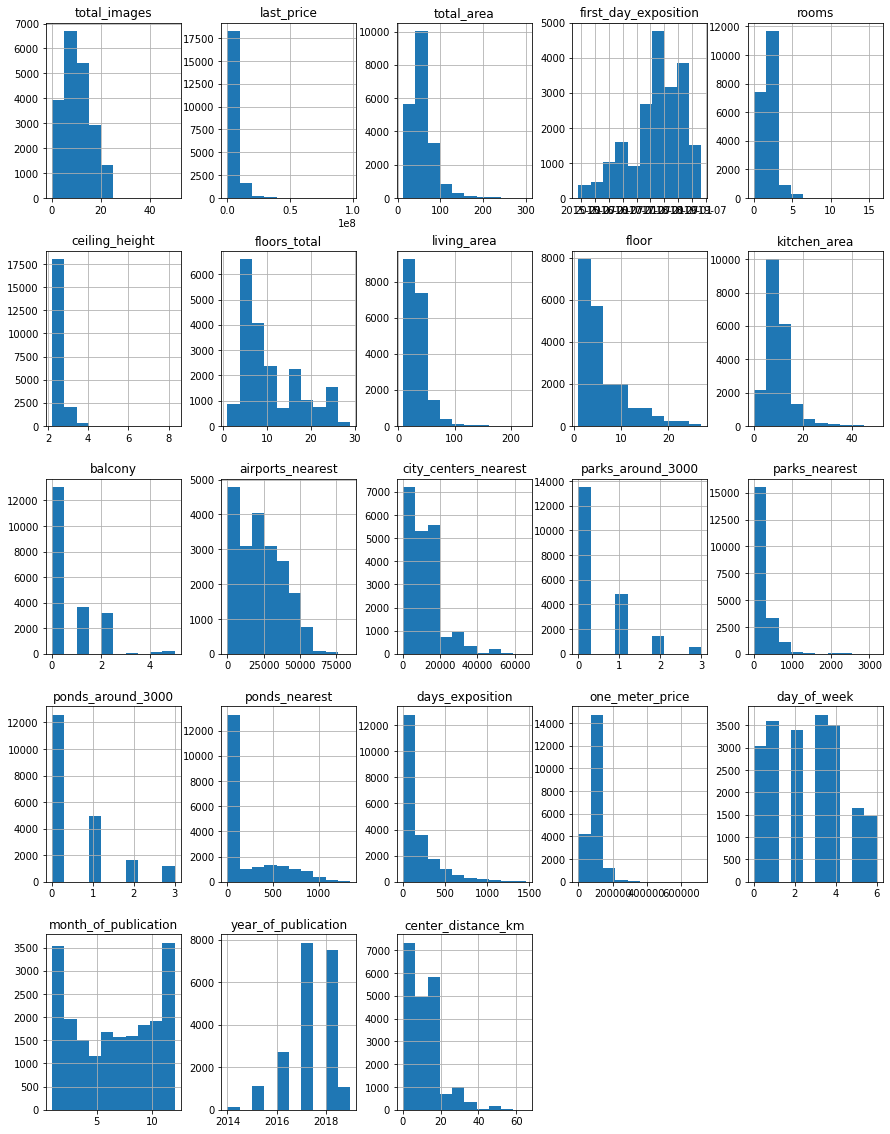

In [324]:
data.hist(figsize = (15, 20));

### Предобработка данных

**1. Найдем и изучим пропущенные значения в стобцах**

**Определим столбцы, содержащие пропущенные значения**

In [224]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заменим пропуски в столбце ceiling_height на медианное значение с проверкой заполнения пропусков**

In [225]:
# общая информация о столбце ceiling_height
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В квартире врядли можно встретить потолки выше 10 метров и ниже 2х метров. Отбросим их при расчете медианы

In [226]:
# медианное значение высоты потолка
data.query('ceiling_height > 2 and ceiling_height < 10')['ceiling_height'].median()

2.65

Заменим аномальные и пропущенные значения на медианные

In [227]:
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2.65

In [228]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = 2.65

In [229]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

**Исправление пропусков в столбце is_apartment**

In [230]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**Исправление пропусков в столбце kitchen_area**

In [231]:
# Количество заполненных значений по столбцу kitchen_area для столбца studio
data.groupby('studio')['kitchen_area'].count()

studio
False    21421
True         0
Name: kitchen_area, dtype: int64

Для студий действительно не указана площадь кухни. Можно заменить пропуски на 0.

In [232]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

**Заменим пропуски в стобцах balcony, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest,
ponds_around_3000, ponds_nearest, days_exposition на 0**

In [233]:
data[['balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around_3000', 
      'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition']] = data[['balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around_3000', 
      'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition']]. fillna (value = 0 )

In [234]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest           0
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition            0
dtype: int64

**Разберем причины пропусков значений и возможные пути устранения пропусков**

ceiling_height           9195 - пропуск возможно означает ошибку в данных (заполним медианным значением)<br>
floors_total               86 - пропуск означает незаполение данных (оставим без измененией)<br>
living_area              1903 - нельзя однозначно определить причину пропуска (оставим без измененией)<br>
is_apartment            20924 - пропуск возможно означает, что это не апартаменты (заменим на False)<br>
kitchen_area             2278 - пропуск возможно означает отсутствие отдельного помещения для кухни (проверить, является ли помещение студией, если да, поставить 0)<br>
balcony                 11519 - пропуск возможно означает отсутствие балкона (заменим на 0)<br>
locality_name              49 - нельзя однозначно определить причину пропуска (оставим 0)<br>
airports_nearest         5542 - пропуск означает отсутствие аэропорта рядом (заменим на 0)<br>
city_centers_nearest      5519 - пропуск означает, что объект удален от центра города (заменим на 0)<br>
parks_around_3000         5518 - пропуск означает отсутствие парка в радиусе 3 км (заменим на 0)<br>
parks_nearest           15620 - пропуск означает отсутствие парка рядом (заменим на 0)<br>
ponds_around_3000         5518 - пропуск означает отсутствие пруда в радиусе 3 км (заменим на 0)<br>
ponds_nearest           14589 - пропуск означает отсутствие водоема рядом (заменим на 0)<br>
days_exposition          3181 - пропуск означает неснятые с публикации объявления (заменим на 0)<br>

**2. Рассмотрим типы данных  каждом столбце**

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Нужно изменить типы данных:**<br>
- По столбцу is_apartment наблюдается некорректный тип данных. Должен быть bool.<br>
- По столбцу first_day_exposition наблюдается некорректный тип данных. Должен быть datetime64.<br>
- По столбцу floors_total наблюдается некорректный тип данных. Должен быть int64.<br>
- По столбцу last_price наблюдается некорректный тип данных. Должен быть int64 <br>
- По столбцу balcony наблюдается некорректный тип данных. Должен быть int64 <br>
- По столбцу days_exposition наблюдается некорректный тип данных. Должен быть int64 <br>

**Преобразуем типы данных в выбранных столбцах с помощью try()**

In [236]:
try:
    data['is_apartment'] = data['is_apartment'].astype('bool')
    print('Тип данных исправлен успешно для столбца is_apartment')
except:
    print('Возникла ошибка при исправлении типа данных в стоблце is_apartment')
    
try:
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
    print('Тип данных исправлен успешно для столбца first_day_exposition')
except:
    print('Возникла ошибка при исправлении типа данных в стоблце first_day_exposition')  
    
try:
    data['floors_total'] = pd.to_numeric(data['floors_total'], errors='coerce')
    print('Тип данных исправлен успешно для столбца floors_total')
except:
    print('Возникла ошибка при исправлении типа данных в стоблце floors_total') 
    
try:
    data['last_price'] = data['last_price'].astype('int64')
    print('Тип данных исправлен успешно для столбца last_price')
except:
    print('Возникла ошибка при исправлении типа данных в стоблце last_price')   
    
try:
    data['balcony'] = data['balcony'].astype('int64')
    print('Тип данных исправлен успешно для столбца balcony')
except:
    print('Возникла ошибка при исправлении типа данных в стоблце balcony')
    
try:
    data['days_exposition'] = data['days_exposition'].astype('int64')
    print('Тип данных исправлен успешно для столбца days_exposition')
except:
    print('Возникла ошибка при исправлении типа данных в стоблце days_exposition')    
    
    

Тип данных исправлен успешно для столбца is_apartment
Тип данных исправлен успешно для столбца first_day_exposition
Тип данных исправлен успешно для столбца floors_total
Тип данных исправлен успешно для столбца last_price
Тип данных исправлен успешно для столбца balcony
Тип данных исправлен успешно для столбца days_exposition


In [237]:
# проверим отображение даты в таблице
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Изменение типов данных требуется для быстрой и корректной работы с данными.

**3. Изучим уникальные значения и устраним неявные дубликаты в столбце locality_name**

**Найдем уникальные значения в столбце locality_name**

In [238]:
len(data['locality_name'].unique())

365

**Определим количество дубликотов**

In [239]:
data['locality_name'].duplicated().sum()

23334

**Посмотрим содержание столбца**

In [240]:
data['locality_name'].value_counts()

Санкт-Петербург          15721
посёлок Мурино             522
посёлок Шушары             440
Всеволожск                 398
Пушкин                     369
                         ...  
поселок Ромашки              1
посёлок Мыза-Ивановка        1
поселок Лисий Нос            1
деревня Пельгора             1
посёлок Алексеевка           1
Name: locality_name, Length: 364, dtype: int64

**Приведем названия к нижнему регистру**

In [241]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].head(10)

0              санкт-петербург
1               посёлок шушары
2              санкт-петербург
3              санкт-петербург
4              санкт-петербург
5    городской посёлок янино-1
6            посёлок парголово
7              санкт-петербург
8               посёлок мурино
9              санкт-петербург
Name: locality_name, dtype: object

**Заменим ё на е**

In [242]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

**Заменяем "городской поселок" на "поселок городского типа"**

In [243]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

**Проверим наличие дубликатов**

In [244]:
data['locality_name'].duplicated().sum()

23375

In [245]:
len(data['locality_name'].unique())

324

**4. Работа с редкими и выбивающимися значениями**

In [246]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.697811,10.673824,34.457852,5.892358,9.553814,0.591080,22060.285497,10886.426896,0.469049,167.315499,0.590911,199.114140,156.608844
std,5.682529,1.088701e+07,35.654083,1.078405,0.231773,6.597173,22.030445,4.885249,6.420973,0.959298,16455.276292,9634.613697,0.748534,306.709997,0.883999,305.188777,213.546873
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,6.300000,0.000000,10196.500000,2242.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,21869.000000,11247.000000,0.000000,0.000000,0.000000,0.000000,74.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,11.440000,1.000000,34327.000000,15248.500000,1.000000,301.000000,1.000000,389.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


total_images, last_price, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest - нет замечаний

**Изучим last_price**

In [247]:
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью меньше 100 000:', data.query('last_price < 1e+05')['last_price'].count())
print('Квартир стоимостью больше 100 000 000:', data.query('last_price > 1e+08')['last_price'].count())

Квартир стоимостью 0: 0
Квартир стоимостью меньше 100 000: 1
Квартир стоимостью больше 100 000 000: 37


Удалим объявления с квартирами дороже 100 000 000

In [248]:
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())

Квартир стоимостью больше 100.000.000: 0


total_images, last_price - нет замечаний

**Изучим total_area**

In [249]:
print('Количество квартир площадью 0:', data.query('total_area == 0')['total_area'].count())
print('Количество квартир площадью больше 300:', data.query('total_area > 300')['total_area'].count())

Количество квартир площадью 0: 0
Количество квартир площадью больше 300: 45


Удалим объявления с квартирами больше 300 метров

In [250]:
data.drop(index=data.query('total_area > 300').index,inplace=True)
print('Квартир площадью больше 300:', data.query('total_area > 300')['total_area'].count())

Квартир площадью больше 300: 0


**Изучим rooms**

In [251]:
print('Число комнат 0:', data.query('rooms == 0')['rooms'].count())
print('Число комнат больше 15:', data.query('rooms > 300')['rooms'].count())

Число комнат 0: 196
Число комнат больше 15: 0


Количество комнат 0 возможно для студий, апартаметов либо квартир свободной планировки. Проверим эту гипотезу.

In [252]:
print('Студии:',data.query('rooms == 0 and studio')['rooms'].count()) 
print('Апартаменты:',data.query('rooms == 0 and is_apartment')['rooms'].count()) 
print('Свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())

Студии: 138
Апартаменты: 0
Свободная планировка: 58


Гипотеза верна.

**Изучим ceiling_height**

In [253]:
print('Высота потолков меньше 2.2 метров:', data.query('ceiling_height < 2.2')['ceiling_height'].count())

Высота потолков меньше 2.2 метров: 11


Удалим объявления с высотой потолка меньше 2.2 метров

In [254]:
data.drop(index=data.query('ceiling_height < 2.2').index,inplace = True)
print('Высота потолков меньше 2.2 метров:', data.query('ceiling_height < 2.2')['ceiling_height'].count())

Высота потолков меньше 2.2 метров: 0


**Изучим floors_total**

In [255]:
print('Количество квартир в одноэтажных домах : ',data.query('floors_total == 1')['floors_total'].count())
print('Количество квартир в домах высотой больше 37 этажей : ',data.query('floors_total > 37')['floors_total'].count())

Количество квартир в одноэтажных домах :  25
Количество квартир в домах высотой больше 37 этажей :  2


Одноэтажные дома не являются аномалиями.<br>
В Санкт-Петербурге и области нет жилых зданий, высотой более 37 этажей. Удалим эту аномалию

In [256]:
data.drop(index=data.query('floors_total > 30').index,inplace=True)
print('Количество квартир в домах высотой больше 37 этажей : ',data.query('floors_total > 37')['floors_total'].count())

Количество квартир в домах высотой больше 37 этажей :  0


**Изучим living_area**

Проверим нет ли квартир с жилой площадью больше, чем общая площадь

In [257]:
print('Жилая площадь больше общей:', data.query('living_area > total_area')['living_area'].count())

Жилая площадь больше общей: 0


Проверим количество квартир с жилой площадью меньше 8 метров

In [258]:
print('Количество квартир с жилой площадью меньше 8 метров : ',data.query('living_area < 8')['living_area'].count())

Количество квартир с жилой площадью меньше 8 метров :  8


Удалим их из данных

In [259]:
data.drop(index=data.query('living_area < 8').index,inplace=True)
print('Количество квартир с жилой площадью меньше 8 метров : ',data.query('living_area < 8')['living_area'].count())

Количество квартир с жилой площадью меньше 8 метров :  0


**Изучим kitchen_area**

In [260]:
print('Количество квартир с кухней больше 50 метров:', data.query('kitchen_area > 50')['kitchen_area'].count())

Количество квартир с кухней больше 50 метров: 34


Удалим объявления с квартирами, в которых кухнями больше 50 метров

In [261]:
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)
print('Количество квартир с кухней больше 50 метров:', data.query('kitchen_area > 50')['kitchen_area'].count())

Количество квартир с кухней больше 50 метров: 0


**Изучим days_exposition**

In [262]:
print('Количество неопубликованных объявлений:', data.query('days_exposition == 0')['days_exposition'].count())
print('Количество объявлений старше четырех лет:', data.query('days_exposition > 365*4')['days_exposition'].count())

Количество неопубликованных объявлений: 3151
Количество объявлений старше четырех лет: 11


Удалим неопубликованные и старые объявления

In [263]:
data.drop(index=data.query('days_exposition == 0').index,inplace=True)
data.drop(index=data.query('days_exposition > 365*4').index,inplace=True)
print('Количество неопубликованных объявлений:', data.query('days_exposition == 0')['days_exposition'].count())
print('Количество объявлений старше четырех лет:', data.query('days_exposition > 365*4')['days_exposition'].count())

Количество неопубликованных объявлений: 0
Количество объявлений старше четырех лет: 0


Проверим информацию по таблице после внесения изменений

In [264]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,20370.000000,2.037000e+04,20370.000000,20370.000000,20370.000000,20293.000000,18677.000000,20370.000000,20370.000000,20370.000000,20370.000000,20370.000000,20370.000000,20370.000000,20370.000000,20370.000000,20370.000000
mean,9.592243,5.845502e+06,57.732341,2.009966,2.689813,10.848371,32.960381,5.977074,9.225348,0.592243,22260.390722,11059.599509,0.460579,165.183800,0.581492,199.911193,179.731861
std,5.651433,5.430886e+06,28.403105,1.016458,0.216296,6.595978,18.597862,4.924419,5.571420,0.948659,16497.278029,9618.271753,0.741418,306.691153,0.871914,306.222337,217.360004
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.000000,3.400000e+06,39.400000,1.000000,2.600000,5.000000,18.300000,2.000000,6.300000,0.000000,10586.000000,2723.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.500000e+06,50.610000,2.000000,2.650000,9.000000,30.000000,4.000000,8.800000,0.000000,21928.000000,11477.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,14.000000,6.490000e+06,67.300000,3.000000,2.700000,16.000000,41.300000,8.000000,11.117500,1.000000,34694.750000,15369.000000,1.000000,289.000000,1.000000,393.000000,230.000000
max,50.000000,9.800000e+07,300.000000,16.000000,8.300000,29.000000,225.900000,27.000000,50.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1458.000000


In [323]:
duplicateRows = data[data.duplicated()]
duplicateRows

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_meter_price,day_of_week,month_of_publication,year_of_publication,floor_type,center_distance_km


### Посчитайте и добавьте в таблицу новые столбцы

**Добавим столбец one_meter_price (цена одного квадратного метра)**

In [265]:
data['one_meter_price'] = data['last_price'] / data['total_area']

In [266]:
data['one_meter_price'] = data['one_meter_price'].round(1)

In [267]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_meter_price
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81,82920.8
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.7
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.1
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,0,поселок городского типа янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55,95065.8


**Добавим столбец day_of_publication (день недели публикации объявления)**

In [268]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday

**Добавим столбец month_of_publication (месяц недели публикации объявления)**

In [269]:
data['month_of_publication'] = data['first_day_exposition'].dt.month

**Добавим столбец year_of_publication (год недели публикации объявления)**

In [270]:
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [271]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_meter_price,day_of_week,month_of_publication,year_of_publication
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,18603.0,0.0,0.0,0.0,0.0,81,82920.8,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,13933.0,1.0,90.0,2.0,574.0,558,92785.7,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424,408176.1,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0.0,0.0,0.0,0.0,0.0,55,95065.8,0,9,2018
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,19143.0,0.0,0.0,0.0,0.0,155,99195.7,3,11,2017
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0.0,0.0,0.0,0.0,0.0,189,87454.8,2,5,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,15008.0,0.0,0.0,0.0,0.0,289,88524.6,6,2,2017
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,13878.0,1.0,310.0,2.0,553.0,137,127525.3,3,11,2017
11,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,51677.0,0.0,0.0,0.0,0.0,7,75000.0,0,8,2018


**Добавим столбец floor_type (тип этажа)**

In [272]:
last_floor = data.query('floors_total == floor')
data['floor_type'] = data['floor']
data.loc[data['floor_type'] == 1, 'floor_type'] = 'Первый'
data.loc[last_floor.index, 'floor_type'] = 'Последний'
data.loc[(data['floor_type'] != 'Первый') & (data['floor_type']!= 'Последний'), 'floor_type'] = 'Другой'
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_meter_price,day_of_week,month_of_publication,year_of_publication,floor_type
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,0.0,0.0,0.0,81,82920.8,1,12,2018,Первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558,92785.7,3,8,2015,Другой
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424,408176.1,4,7,2015,Другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,Другой
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0.0,0.0,0.0,0.0,55,95065.8,0,9,2018,Другой
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,0.0,0.0,0.0,155,99195.7,3,11,2017,Другой
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0.0,0.0,0.0,0.0,189,87454.8,2,5,2018,Другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,0.0,0.0,0.0,289,88524.6,6,2,2017,Другой
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,1.0,310.0,2.0,553.0,137,127525.3,3,11,2017,Другой
11,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,0.0,0.0,0.0,0.0,7,75000.0,0,8,2018,Другой


In [273]:
data['floor_type'].value_counts()

Другой       15124
Последний     2803
Первый        2443
Name: floor_type, dtype: int64

**Добавим столбец center_distance_km (расстояние до центра города в километрах**

In [274]:
data['center_distance_km'] = data['city_centers_nearest']/1000
try:
    data['center_distance_km'] = data['center_distance_km'].astype('int')
    print ('ok')
except:
    print ('conversation failed')

ok


In [275]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_meter_price,day_of_week,month_of_publication,year_of_publication,floor_type,center_distance_km
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,0.0,0.0,81,82920.8,1,12,2018,Первый,18
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574.0,558,92785.7,3,8,2015,Другой,13
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,84.0,3.0,234.0,424,408176.1,4,7,2015,Другой,6
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121,100000.0,1,6,2018,Другой,8
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0.0,0.0,0.0,55,95065.8,0,9,2018,Другой,0
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,0.0,0.0,155,99195.7,3,11,2017,Другой,19
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0.0,0.0,0.0,189,87454.8,2,5,2018,Другой,0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,0.0,0.0,289,88524.6,6,2,2017,Другой,15
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,310.0,2.0,553.0,137,127525.3,3,11,2017,Другой,13
11,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,0.0,0.0,0.0,7,75000.0,0,8,2018,Другой,51


### Проведите исследовательский анализ данных

**1. Изучим параметры объектов с помощью гистограмм**

* Общая площадь (total_area)

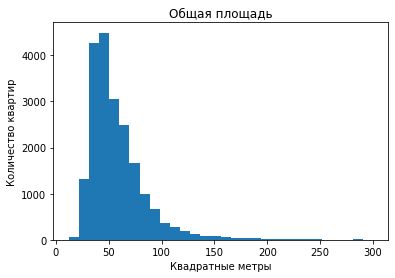

In [276]:
plt.hist(data['total_area'], bins=30, range=(12,300))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [277]:
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

Наибольшие по площади варианты:
8038     300.0
23005    297.5
10181    295.0
15017    293.6
16915    292.2
22345    290.0
4536     290.0
18891    290.0
22238    287.5
11319    284.0
Name: total_area, dtype: float64


Вывод: в подбоке по большей части содержатся объявления о продаже квартир общей площадью около 40 - 100 кадратных метров. Также имеется несколько квартир большой площади.

* Жилая площадь (living_area)

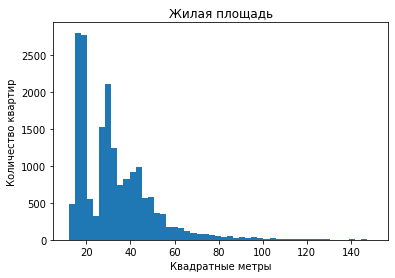

In [278]:
plt.hist(data['living_area'], bins=50, range=(12,150))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [279]:
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

Наибольшие по жилой площади варианты:
16915    225.9
21685    211.0
10246    200.0
6728     195.0
4199     193.5
7694     193.0
18891    189.4
8742     184.9
22238    183.7
23005    181.8
Name: living_area, dtype: float64


Вывод: в подборке в основном присутствуют квартиры с жилой прощадью от 17 до 70 квадратных метров.

* Площадь кухни (kitchen_area)

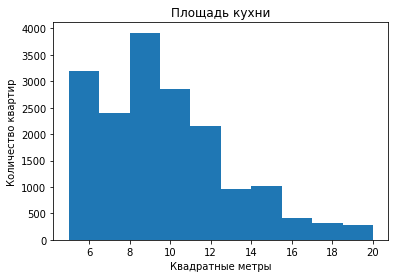

In [280]:
plt.hist(data['kitchen_area'], bins=10, range=(5,20))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [281]:
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

Наибольшие по площади кухни варианты:
511      50.0
656      50.0
5135     50.0
2356     50.0
10001    50.0
51       50.0
20284    48.3
11747    48.0
3965     48.0
6682     46.8
Name: kitchen_area, dtype: float64


Вывод: большинство квартир из выбоки имеют кухни площадью от 5 до 15 метров, но встречаются также и варианты с большей площадью.

* Цена объекта (last_price)

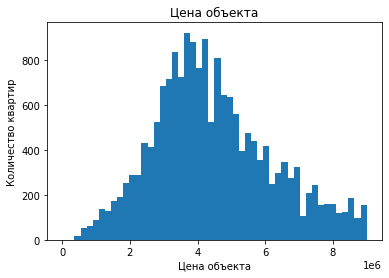

In [282]:
plt.hist(data['last_price'], bins=50, range=(0, 9000000))
plt.title('Цена объекта')
plt.xlabel('Цена объекта')
plt.ylabel('Количество квартир')
plt.show()

In [283]:
print('Наиболее дорогие варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

Наиболее дорогие варианты:
16590    98000000
11329    95000000
509      90000000
5534     87000000
10362    83820000
6462     82000000
6460     82000000
22804    81960000
8742     80000000
11560    79339000
Name: last_price, dtype: int64


Вывод: большая часть квартир находится в ценовом диапозоне около 4х миллионов

* Количество комнат (rooms)

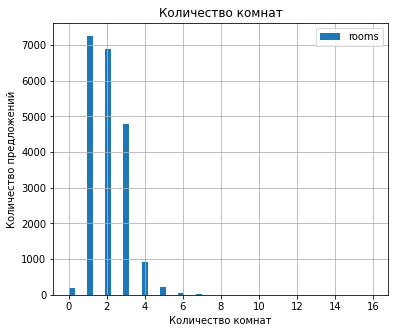

In [284]:
data.plot(kind='hist',y='rooms',title='Количество комнат',grid=True, bins=50, figsize=(6,5))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

In [285]:
print('Варианты с наибольшим количеством комнат:')
print(data['rooms'].sort_values(ascending=False).head(10))

Варианты с наибольшим количеством комнат:
18848    16
20829    14
9688     11
18119    10
18891    10
8860      9
16915     9
4435      8
18945     8
17203     8
Name: rooms, dtype: int64


Вывод: в выборке больше всего предложений 1-3х комнатных квартир

* Высота потолков (ceiling_height)

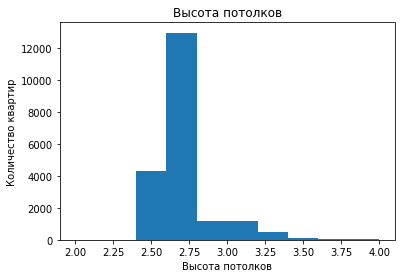

In [286]:
plt.hist(data['ceiling_height'], bins=10, range=(2, 4))
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

In [287]:
print('Варианты с наиболее высокими потолками:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Варианты с наиболее высокими потолками:
5863     8.3
3474     8.0
15743    8.0
17442    8.0
21227    5.8
12628    5.3
464      5.2
1053     5.0
2802     4.8
19142    4.7
Name: ceiling_height, dtype: float64


Вывод: высота потолков квартир из выборки в основном составляет 2.6 - 2.75 метра, но присутствуют также варианты с высотой больше 5ти метров (возможно двухуровневые апартаменты).

* Этаж квартиры (floor)

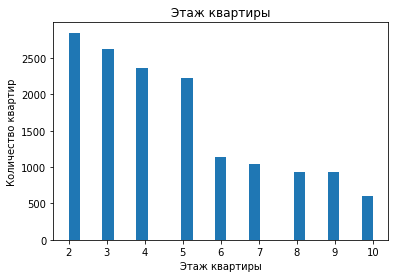

In [288]:
plt.hist(data['floor'], bins=27, range=(2, 10))
plt.title('Этаж квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()

In [289]:
print('Варианты с наиболее высоким расположением квартиры:')
print(data['floor'].sort_values(ascending=False).head(10))

Варианты с наиболее высоким расположением квартиры:
16644    27
13276    27
2629     27
6157     27
4091     27
113      27
23292    27
7711     27
23428    26
15053    26
Name: floor, dtype: int64


Вывод: большая часть продаваемых квартир находися на этажах со второго по пятый, но также есть варианты на постедних этажах высотных зданий.

* Тип этажа квартиры(floor_type)

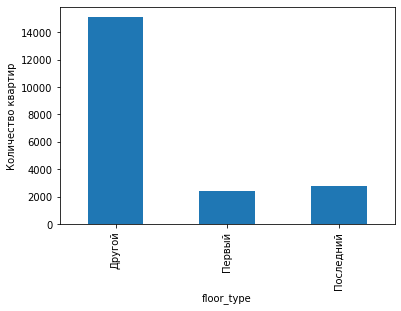

In [326]:
data.groupby(by = 'floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'Количество квартир');

Вывод: основная часть квартир находится на этажах, оличных от первого и последнего.

* Общее количество этажей в доме(floors_total)

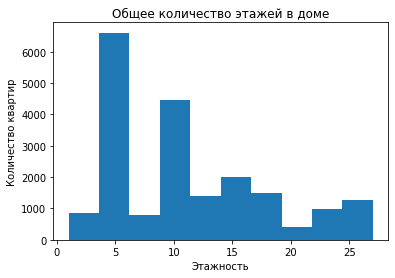

In [291]:
plt.hist(data['floors_total'], bins=10, range=(1, 27))
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')
plt.show()

Вывод: большая части жилой недвижимости в выбоке располагается в пятиэтажных и десятиэтажных домах.

* Расстояние до центра города в метрах (city_centers_nearest)

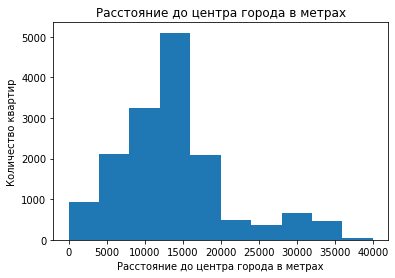

In [292]:
plt.hist(data['city_centers_nearest'], bins=10, range=(1, 40000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество квартир')
plt.show()

Вывод: В основном продаваемые объекты находятся на расстоянии от 10 до 15ти километров от центра города.

* Расстояние до ближайшего аэропорта (airports_nearest)

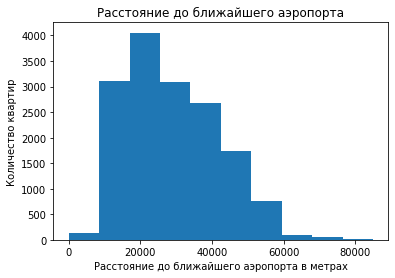

In [293]:
plt.hist(data['airports_nearest'], bins=10, range=(1, 85000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта в метрах')
plt.ylabel('Количество квартир')
plt.show()

Вывод: большая часть квартир находится на расстоянии 20 километров от аэропорта.

* Расстояние до ближайшего парка (parks_nearest)

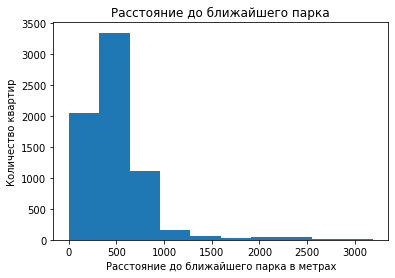

In [294]:
plt.hist(data['parks_nearest'], bins=10, range=(1, 3190))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка в метрах')
plt.ylabel('Количество квартир')
plt.show()

Вывод: большинство квартир находятся в 400 - 500 метрах от парка 

* День публикации (day_of_week)

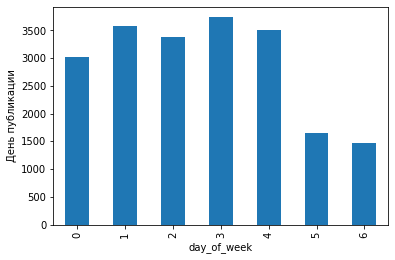

In [327]:
data.groupby(by = 'day_of_week')['day_of_week'].count().plot(kind='bar', ylabel = 'День публикации');

Вывод: в будние дни происходит основная активность по публикации объявлений. В четверг - пиковая.

* Месяц публикации (month_of_publication)

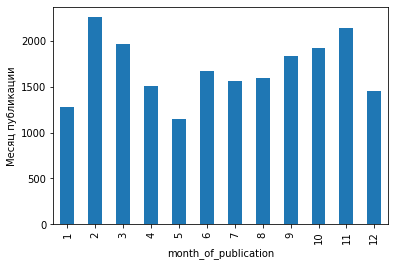

In [328]:
data.groupby(by = 'month_of_publication')['month_of_publication'].count().plot(kind='bar', ylabel = 'Месяц публикации');

Вывод: в феврале и ноябре наблюдается больше всего публикаций объявлений, затем в марте и октябре. Наименьшая активность по публикации была в мае. 

Наиболее типичное объявление содержит 2х комнатную квартиру, с площадью около 50 квадратных метров, стоимостью около 5ти миллионов, с кухней от 8 до 10 метров, недалеко от парка, но удаленно от аэропорта.

**2. Изучение скорости продажи квартиры**

* Посторим гистограмму по столбцу days_exposition

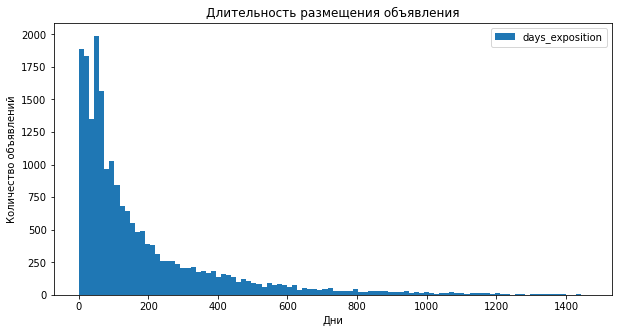

In [297]:
data.plot(kind='hist',y='days_exposition',title='Длительность размещения объявления', bins=100, figsize=(10,5))
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.show()

* Вычислим среднее и медианное значения

In [298]:
data['days_exposition'].agg(['mean','median'])

mean      179.731861
median     95.000000
Name: days_exposition, dtype: float64

* Выявим быстрые и необычно долгие продажи

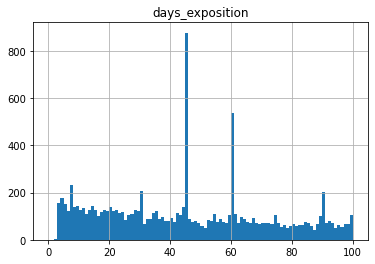

In [331]:
data.hist('days_exposition', bins=100, range = (0,100));

In [300]:
data['days_exposition'].describe()

count    20370.000000
mean       179.731861
std        217.360004
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1458.000000
Name: days_exposition, dtype: float64

In [301]:
data['days_exposition'].value_counts()

45      876
60      538
7       232
30      208
90      202
       ... 
1080      1
1064      1
1032      1
1016      1
1391      1
Name: days_exposition, Length: 1130, dtype: int64

Вывод: средний срок размещения объявления до момента снятия с публикации составляет 180 дней, наиболее типичный срок - 95 дней.<br>
Необычно быстро были произведены продажи за 45, 60, 7, 30 и 90 дней. <br>
Необычно долгими можно считать продажи по объявлениям, находящимся в публикации более 230 дней.

**3. Рассмотрим факторы, которые больше всего влияют на общую (полную) стоимость объекта**

* Зависимость стоимости от общей площади

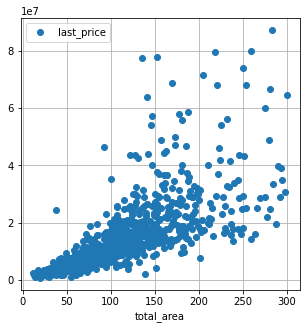

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.799255
total_area    0.799255    1.000000 



In [302]:
(
    data.pivot_table(index = 'total_area', values = 'last_price')
    .plot(grid = True, style = 'o', figsize = (5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index = 'floor', values = ['total_area', 'last_price']).corr(),'\n')

* Зависимость стоимости от жилой площади

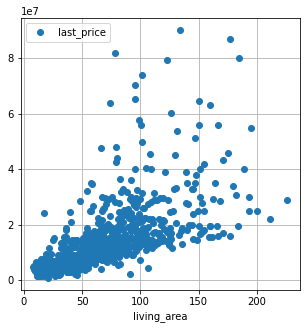

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.355179
living_area    0.355179     1.000000 



In [303]:
(
    data.pivot_table(index = 'living_area', values = 'last_price')
    .plot(grid = True, style = 'o', figsize = (5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index = 'floor', values = ['living_area', 'last_price']).corr(),'\n')

* Зависимость стоимости от площади кухни

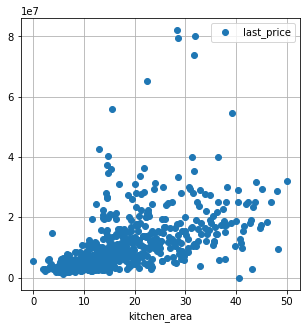

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.344975
last_price        0.344975    1.000000 



In [304]:
(
    data.pivot_table(index = 'kitchen_area', values = 'last_price')
    .plot(grid = True, style = 'o', figsize = (5, 5))
)
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index = 'floor', values = ['kitchen_area', 'last_price']).corr(),'\n')

* Зависимость стоимости от количества комнат

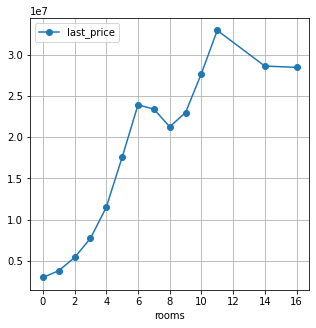

Корреляция цены и количества комнат: 

            last_price     rooms
last_price    1.000000  0.182575
rooms         0.182575  1.000000 



In [305]:
(
    data.pivot_table(index = 'rooms', values = 'last_price')
    .plot(grid = True, style = '-o', figsize = (5, 5))
)
plt.show()
print('Корреляция цены и количества комнат:','\n')
print(data.pivot_table(index = 'floor', values = ['rooms', 'last_price']).corr(),'\n')

* Зависимость стоимости от этажа

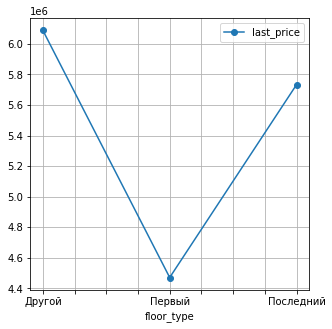

Корреляция цены и этажа: 

            last_price
last_price         1.0 



In [306]:
(
    data.pivot_table(index = 'floor_type', values = 'last_price')
    .plot(grid = True, style = '-o', figsize = (5, 5))
)
plt.show()
print('Корреляция цены и этажа:','\n')
print(data.pivot_table(index = 'floor', values = ['floor_type', 'last_price']).corr(),'\n')

* Зависимость стоимости от даты размещения (день недели, месяц, год)

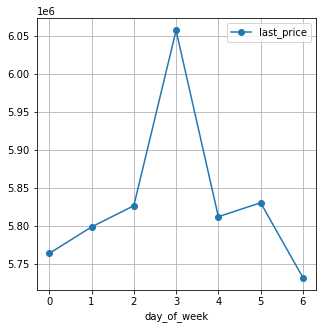

Корреляция цены и дня недели: 

             day_of_week  last_price
day_of_week     1.000000   -0.138782
last_price     -0.138782    1.000000 



In [307]:
(
    data.pivot_table(index = 'day_of_week', values = 'last_price')
    .plot(grid = True, style = '-o', figsize = (5, 5))
)
plt.show()
print('Корреляция цены и дня недели:','\n')
print(data.pivot_table(index = 'floor', values = ['day_of_week', 'last_price']).corr(),'\n')

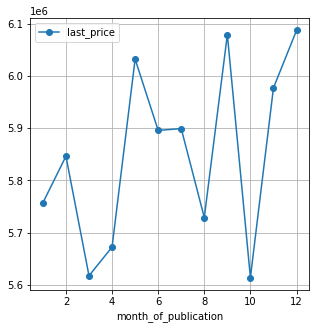

Корреляция цены и месяца публикации: 

                      last_price  month_of_publication
last_price              1.000000             -0.134452
month_of_publication   -0.134452              1.000000 



In [308]:
(
    data.pivot_table(index = 'month_of_publication', values = 'last_price')
    .plot(grid = True, style = '-o', figsize = (5, 5))
)
plt.show()
print('Корреляция цены и месяца публикации:','\n')
print(data.pivot_table(index = 'floor', values = ['month_of_publication', 'last_price']).corr(),'\n')

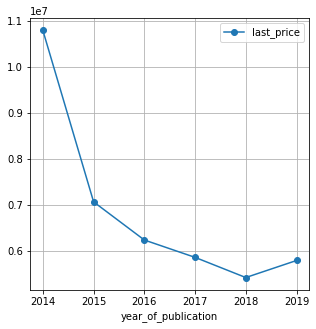

Корреляция цены и года публикации: 

                     last_price  year_of_publication
last_price             1.000000            -0.042303
year_of_publication   -0.042303             1.000000 



In [309]:
(
    data.pivot_table(index = 'year_of_publication', values = 'last_price')
    .plot(grid = True, style = '-o', figsize = (5, 5))
)
plt.show()
print('Корреляция цены и года публикации:','\n')
print(data.pivot_table(index = 'floor', values = ['year_of_publication', 'last_price']).corr(),'\n')

Вывод: наибольшее влияние на стоимость квартиры оказывает показатель площади квартиры.<br>
Также имеется прямая, но не такая сильная зависимость между стомостью и размером жилой площади и кухни.<br>
При покупке квартиры предпочтительными являются этажи, отличные от первого и последнего.<br>
Анализ зависимости стоимости квартиры от дня и месяца публикации объявления выявил обратную зависимость между данными показателями. Но она также достаточно близка к нулю, что может свидетельствовать о нелинейной зависимости либо ее отсутствии.<br>
По показателю год публикации наблюдается устойчивая обратная зависимость - с течением времени цены на жилье снижаются.

**4. Расчет средней цены одного метра**

* В 10ти населенных пунктах с наибольшим количеством объявлений

In [310]:
top_10 = data.pivot_table(index = 'locality_name', values = 'first_day_exposition', aggfunc = 'count').sort_values(by = 'first_day_exposition', ascending = False)
top_10.columns = ['quantity_of_adv']
print(top_10.head(10))

                   quantity_of_adv
locality_name                     
санкт-петербург              13509
поселок мурино                 550
поселок шушары                 408
всеволожск                     339
колпино                        307
пушкин                         302
поселок парголово              302
деревня кудрово                299
гатчина                        268
выборг                         206


In [314]:
top_10['one_meter_price_mean'] = data.pivot_table(index = 'locality_name', 
                                                  values = 'one_meter_price', 
                                                  aggfunc = 'median')
top_10 = top_10.iloc[:10]
top_10.columns = ['quantity_of_adv', 'one_meter_price_mean']
top_10.sort_values(by = ['one_meter_price_mean'], ascending = False, inplace = True)
print(top_10)

                   quantity_of_adv  one_meter_price_mean
locality_name                                           
санкт-петербург              13509             102923.10
пушкин                         302              97882.10
деревня кудрово                299              91860.50
поселок парголово              302              91387.40
поселок мурино                 550              86059.25
поселок шушары                 408              76220.40
колпино                        307              73913.00
гатчина                        268              67180.70
всеволожск                     339              65789.50
выборг                         206              57164.80


<AxesSubplot:ylabel='locality_name'>

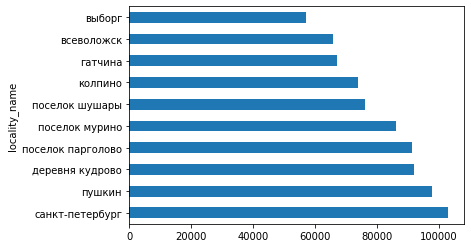

In [316]:
top_10['one_meter_price_mean'].plot(kind='barh')

Вывод: Наибольшее количество объявлений о продаже квартир публикуется по Санкт-Петербургу. Также квадратный мерт жилья в этом городе является самым дорогим. В Выборге и Всеволжске, напротив жилье самое дешевое из десяти наиболее поулярных мест.

**5. Вычисление средней цены каждого километра расстояния до центра в Санкт-Петербурге**

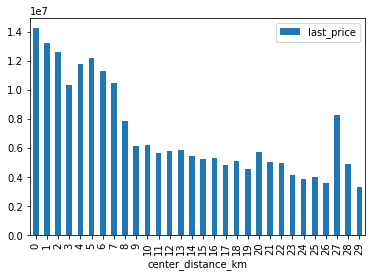

In [325]:
(
    data[data['locality_name'] == 'санкт-петербург']
    .pivot_table(
        index = 'center_distance_km',
        values = 'last_price',
        aggfunc = 'mean')
    .plot(kind = 'bar')
);

Вывод: наиболее дорогой является недвижимость, находящаяся на расстоянии до 7ми километров от центра. Далее цена резко снижается. Таже наблюдается резкое повышение стоимости на расстоянии 27 километров от города. Возможно это недвижимость особой категории.

### Общий вывод

В данных изначально присутствуют значительное количество пропусков и аномально высокие и низкие значения, требующие исправления.<br>
Также в данных наблюдается некорректный тип данных.<br>
<br>
В ходе изучения данных обнаружены следующие особенности:<br>
* Наиболее типичное объявление содержит 1-2х комнатную квартиру, с площадью около 50 квадратных метров, стоимостью около 5ти миллионов, с кухней от 8 до 10 метров, недалеко от парка, но удаленно от аэропорта, в многоэтажном здании.
* Средний срок размещения объявления до момента снятия с публикации составляет 180 дней, наиболее типичный срок - 95 дней.
* Необычно быстро были произведены продажи за 45, 60, 7, 30 и 90 дней - стоит уточнить у разработчиков возможные причины выбросов на случай, если эти выбросы обусловлены автоматическими удалениями объявлений.
* Необычно долгими можно считать продажи по объявлениям, находящимся в публикации более 230 дней.
* Наибольшее влияние на стоимость квартиры оказывает показатель площади квартиры.
* Квартиры, находящиеся на этаже, отличном от первого и последнего, ценятся больше.
* С течением времени к 2019му году наблюдается снижение стоимости жилья.
* Также наиболее дорогими по показателю стоимости квадратного метра считаются квартиры в Санкт-Петербурге, находящиеся в пределах 7 километров от центра.
* Повышенной стоимостью также обладают квартиры в 27ми километрах от Санкт-Петербурга.



**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод